In [31]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [32]:
city_location = {
    '香港':(114.17,22.28)
}

In [33]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"


In [34]:
import re

In [35]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")


In [36]:
city_location


{'香港': (114.17, 22.28)}

In [37]:
for line in coordination_source.split('\n'):
    #print(line)
    city_info  = pattern.findall(line)
    #print(city_info)
    if not city_info: continue
    
    city, long, lat  = city_info[0]
    long,lat = float(long),float(lat)
    city_location[city] = (long,lat)

In [38]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [39]:
import math

In [40]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [41]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [42]:
get_geo_distance('上海', '杭州')


153.5185697155768

In [43]:
import networkx as nx

In [44]:
city_graph = nx.Graph()

In [45]:
city_graph.add_nodes_from(list(city_location.keys()))


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt


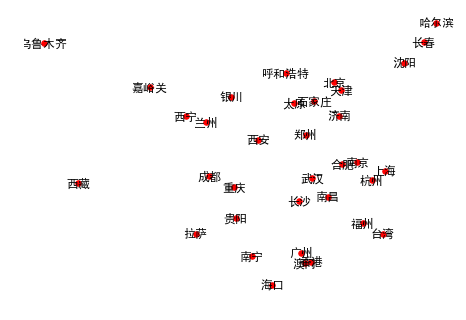

In [47]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [101]:
threshold = 300

In [102]:
city_connection = defaultdict(list)


In [108]:

for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [109]:
city_connection

defaultdict(list,
            {'香港': ['广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门'],
             '广州': ['香港',
              '香港',
              '长沙',
              '澳门',
              '长沙',
              '澳门',
              '香港',
              '香港',
              '长沙',
              '澳门',
              '长沙',
              '澳门'],
             '长沙': ['香港',
              '武汉',
              '郑州',
              '广州',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '澳门',
              '澳门',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '澳门',
              '澳门'],
             '澳门': ['香港',
              '广州',
              '长沙',
              '

In [110]:
city_with_road = nx.Graph(city_connection)


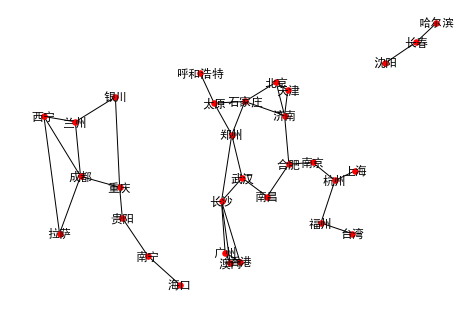

In [111]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)


In [75]:
from collections import defaultdict

In [76]:
simple_connection_info_src= {
    '北京': ['太原','沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [77]:
simple_connection_info = defaultdict(list)

In [78]:
simple_connection_info.update(simple_connection_info_src)

In [98]:
def bfs(graph,start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter  = visited.pop()
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
           # visited.append(successor) # 
            #visited  = visited + [successor]  #新  depth
            visited = [successor] + visited   #旧   breath
            
        seen.add(froninter)
        
    return seen
            
        
        

In [96]:

number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [99]:
bfs(number_grpah,1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [86]:
bfs(simple_connection_info,'北京')

太原
沈阳
西安
郑州
兰州
长沙
福州
南宁


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

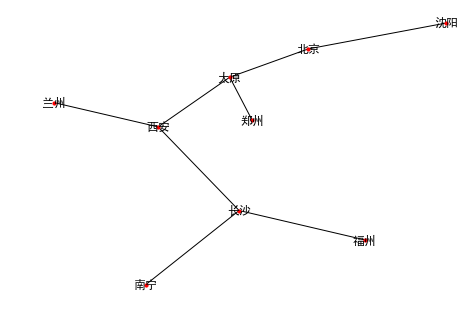

In [49]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

In [57]:
def search(start,des,connection_graph):
    pathes =[[start]]
    
    visitied = set()
    
    while pathes: #
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied:continue
        
        successors = connection_graph[froninter]
        
        for city in successors:
            if city in path: continue
            new_path  = path + [city]
            pathes.append(new_path)
            
            if city ==des:return new_path
        visitied.add(froninter)
            
            
            
    

In [58]:
search('兰州','福州',simple_connection_info)

['兰州', '西安', '长沙', '福州']

In [63]:
search('北京','福州',simple_connection_info)

['北京', '太原', '西安', '长沙', '福州']

In [65]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [67]:
pretty_print(search('北京', '福州', simple_connection_info))


北京🚗->太原🚗->西安🚗->长沙🚗->福州


## breath first search

## depth first search

In [112]:
pretty_print(search('北京', '南京', city_connection))


北京🚗->济南🚗->合肥🚗->南京


In [113]:
pretty_print(search('北京', '长沙', city_connection))


北京🚗->石家庄🚗->郑州🚗->长沙
